In [ ]:
import pandas as pd

# create a sample DataFrame with missing values
df = pd.read_csv('/content/data_who.csv',encoding='cp1252')
df = df.replace('-', None)
df = df.drop([13,33,36,44,55,59,100],axis=0)
df


,Country,Healthy Life expectancy at birth (years),Proportion of births attended by skilled health personneld (%),Under-five mortality ratee (per 1000 live births),Neonatal mortality ratee (per 1000 live births),Tuberculosis incidenceg (per 100 000 population),Hepatitis B surface antigen (HBsAg) prevalence among children under 5 yearsi (%),Reported number of people requiring interventions against NTDs (Neglected Tropical Diseas)j,"Probability of dying from any of CVD, cancer, diabetes, CRD between age 30 and exact age 70k (%)",Suicide mortality ratek (per 100 000 population),...,Density of pharmacistsw (per 10 000 population),Average of 13 International Health Regulations core capacity scoresx,Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE)z (%),Prevalence of anaemia in women of reproductive age (15–49 years)ab (%),Proportion of population with primary reliance on clean fuels and technologyag (%),Annual mean concentrations of fine particulate matter (PM2.5) in urban areasag (µg/m3),Mortality rate due to homicidek (per 100 000 population),Age-standardized prevalence of hypertension among adults aged 30-79 yearsai (%),Prevalence of obesity among children and adolescents (5–19 years)aj (%),Age-standardized prevalence of obesity among adults (18+ years)aj (%)
0,Afghanistan,53.9,62,58,35,193,0.39,14367281,35.3,4.1,...,0.3,41,3.9,42.6,33,63.6,8.5,40.2,3.1,5.5
1,Angola,54.8,50,71,27,350,4.57,7698802,22.2,6.1,...,0.7,40,5.4,44.5,50,40.3,9.2,38.7,2.4,8.2
2,Armenia,67.1,100,11,6,23,0.06,70,19.9,3.3,...,0.5,84,5.7,17.3,98,45.5,3.8,47.3,4.8,20.2
3,Australia,70.9,99,4,2,7,0.13,20401,8.6,12.5,...,9.0,88,16.2,8.5,100,7.3,1.0,29.3,12.4,29.0
4,Austria,70.9,98,4,2,5,0.16,22,10.4,14.6,...,7.2,71,15.7,13.0,100,12.9,0.5,33.8,8.6,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Ukraine,64.3,100,8,5,73,0.25,17,25.5,21.6,...,0.3,65,7.7,17.7,95,14.9,6.3,43.1,7.0,24.1
108,United Arab Emirates,66.0,99,7,4,1,0.02,78,18.5,6.4,...,12.1,96,7.4,24.3,100,42.2,0.7,41.4,17.3,31.7
109,Uzbekistan,64.7,100,14,8,66,0.16,405951,25.3,8.0,...,0.4,65,8.3,24.8,84,33.9,1.5,45.7,4.0,16.6
110,Zambia,54.4,80,61,24,319,1.32,12810245,24.6,7.3,...,1.0,56,7.0,31.5,10,29.4,6.5,32.3,2.9,8.1


,Country,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,Afghanistan,53.9,62,58,35,193,0.39,14367281,35.3,4.1,...,0.3,41,3.9,42.6,33,63.6,8.5,40.2,3.1,5.5
1,Angola,54.8,50,71,27,350,4.57,7698802,22.2,6.1,...,0.7,40,5.4,44.5,50,40.3,9.2,38.7,2.4,8.2
2,Armenia,67.1,100,11,6,23,0.06,70,19.9,3.3,...,0.5,84,5.7,17.3,98,45.5,3.8,47.3,4.8,20.2
3,Australia,70.9,99,4,2,7,0.13,20401,8.6,12.5,...,9.0,88,16.2,8.5,100,7.3,1.0,29.3,12.4,29.0
4,Austria,70.9,98,4,2,5,0.16,22,10.4,14.6,...,7.2,71,15.7,13.0,100,12.9,0.5,33.8,8.6,20.1


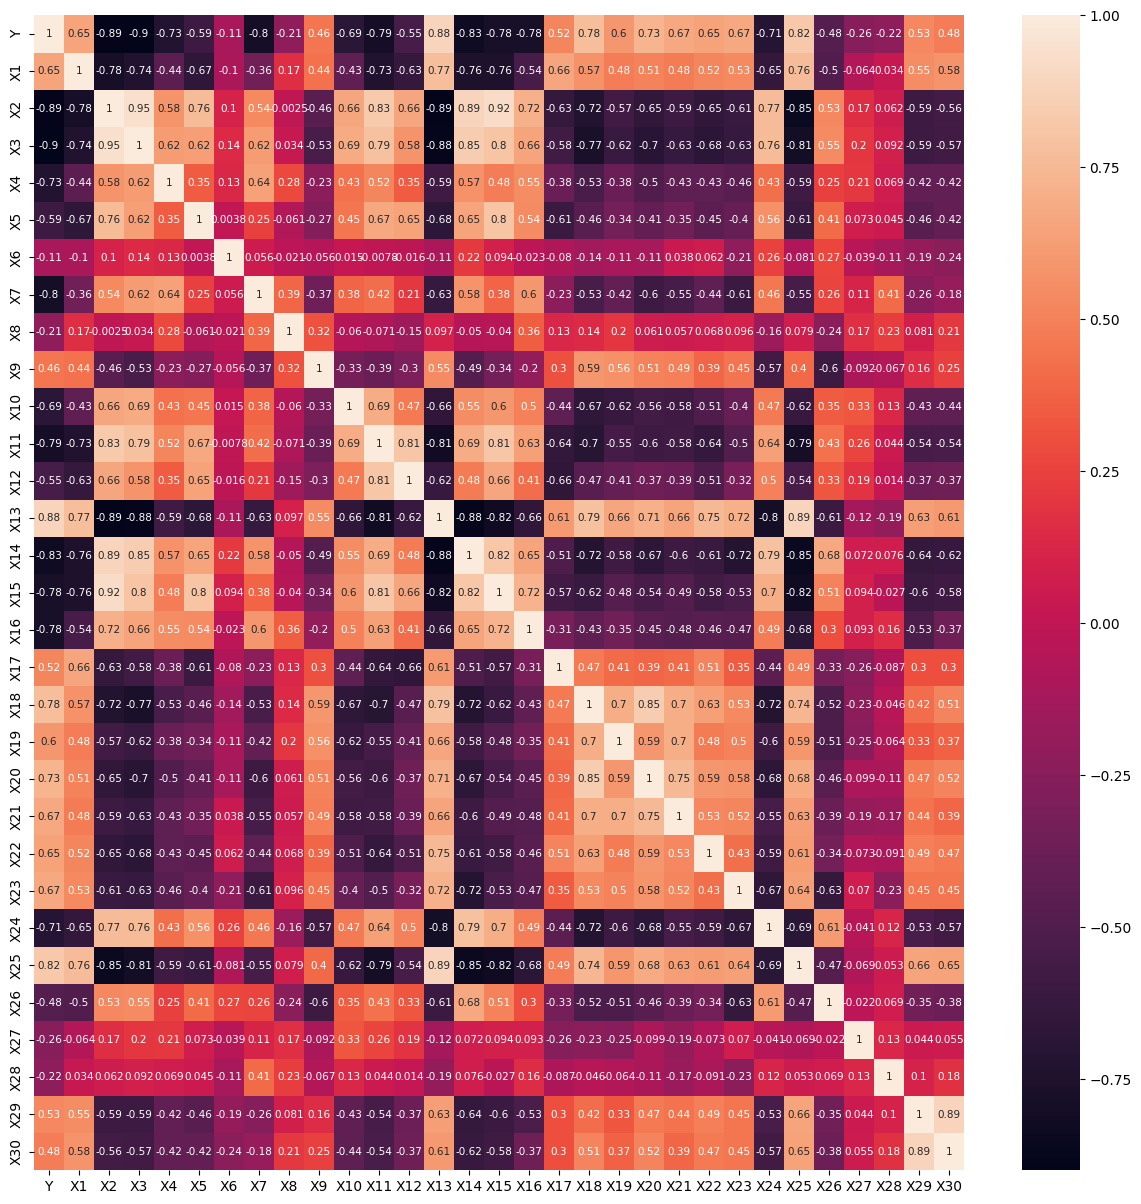

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of new variable names
new_names = ['Country'] + ['Y'] + ['X{}'.format(i) for i in range(1, len(df.columns))]

# loop through columns and rename using the new variable names
for i, column in enumerate(df.columns):
    df = df.rename(columns={column: new_names[i]})

# compute the correlation matrix
corr_matrix = df.corr()

# create a seaborn heatmap with variable names
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True,ax=ax,annot_kws={"fontsize":7.5})


df.head()

<Axes: >

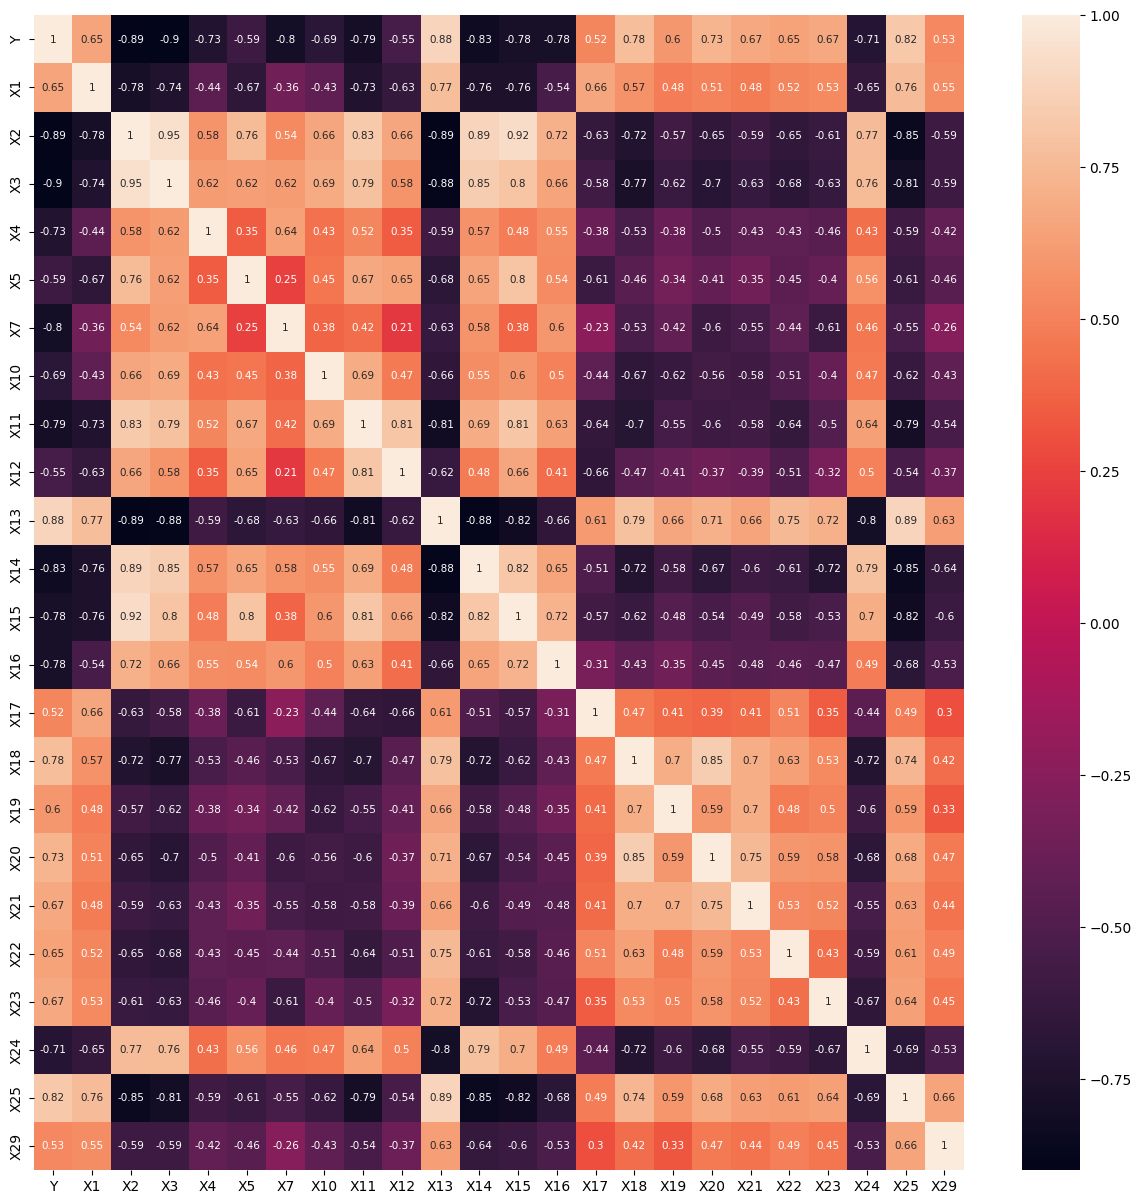

In [ ]:
df = df.drop(columns=['X6','X8','X9','X26','X27','X28','X30'],axis=1)

# compute the correlation matrix
corr_matrix = df.corr()

# create a seaborn heatmap with variable names
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True,ax=ax,annot_kws={"fontsize":7.5})


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df.iloc[:,2:25]
y = df.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# calculating VIF for each feature
vif_data = [variance_inflation_factor(x_train.values, i) 
            for i in range(len(x_train.columns))]
vif_df = pd.DataFrame({'Variabel X':x_train.columns,'VIF':vif_data})  
# filtering rows with VIF less than 10
vif_df_filtered = vif_df[vif_df['VIF'] < 10]
vif_df_filtered

,Variabel X,VIF
3,X4,4.301890
4,X5,5.306365
8,X12,5.917603
12,X16,8.828895
15,X19,5.586309
16,X20,9.859465
17,X21,6.456842
22,X29,8.447157


In [ ]:
dfreg = pd.DataFrame({'Y':df['Y'],
                      'X1':df['X7'],
                      'X2':df['X18'],
                      'X3':df['X15']})
dfreg


,Y,X1,X2,X3
0,53.9,35.3,2.5,13.9
1,54.8,22.2,2.1,48.8
2,67.1,19.9,44.0,0.2
3,70.9,8.6,41.3,0.1
4,70.9,10.4,52.9,0.1
...,...,...,...,...
107,64.3,25.5,29.9,0.3
108,66.0,18.5,26.0,0.1
109,64.7,25.3,23.7,0.4
110,54.4,24.6,1.2,34.9


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = dfreg.iloc[:,1:4]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# calculating VIF for each feature
vif_data = [variance_inflation_factor(x_train.values, i) 
            for i in range(len(x_train.columns))]
vif_df = pd.DataFrame({'Variabel X':x_train.columns,'VIF':vif_data}) 
vif_df 


,Variabel X,VIF
0,X1,2.839621
1,X2,1.633185
2,X3,2.107646


<Axes: >

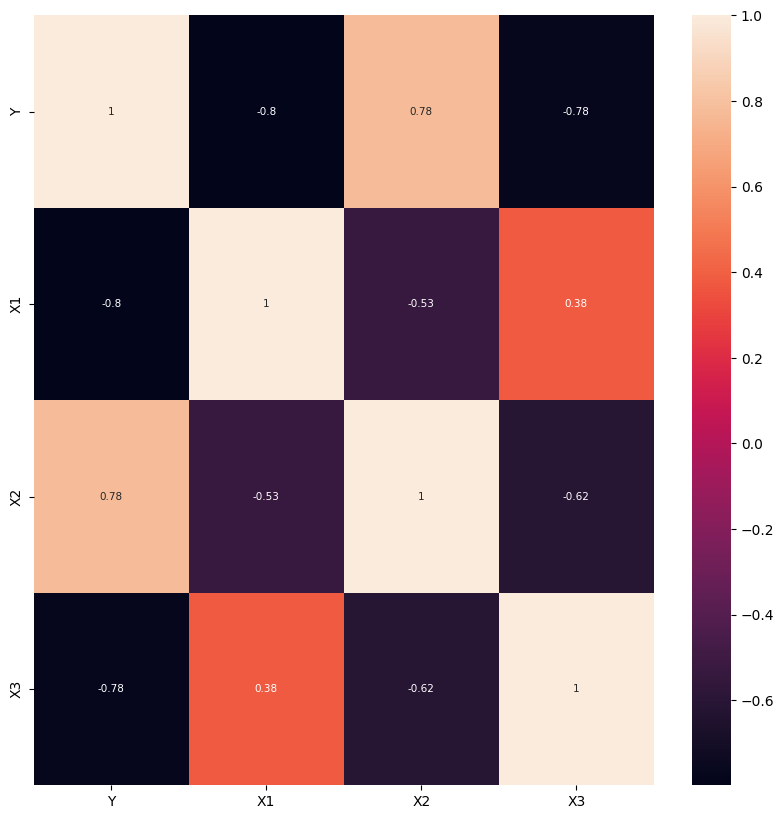

In [ ]:
# compute the correlation matrix
corr_matrix = dfreg.corr()

# create a seaborn heatmap with variable names
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True,ax=ax,annot_kws={"fontsize":7.5})


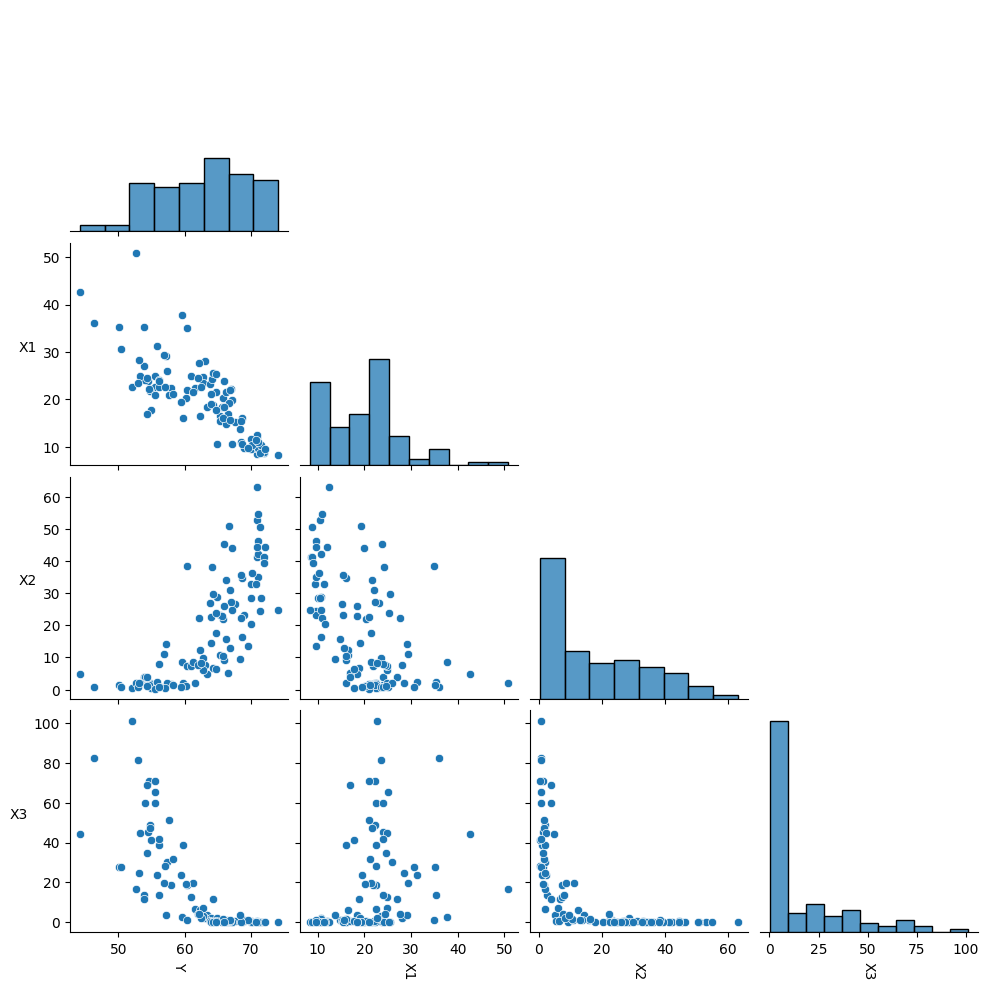

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

g = sns.pairplot(dfreg, corner=True)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
x = dfreg.iloc[:,1:4]
y = dfreg.iloc[:,0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)


X_train: (84, 3)
X_test: (21, 3)
Y_train: (84,)
Y_test: (21,)


In [ ]:
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
x = x_train
y = y_train
x = sm.add_constant(x) # adding a constant

olsmod = sm.OLS(y, x).fit(cov_type="hc0")
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     397.0
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           6.36e-48
Time:                        13:48:46   Log-Likelihood:                -166.41
No. Observations:                  84   AIC:                             340.8
Df Residuals:                      80   BIC:                             350.5
Df Model:                           3                                         
Covariance Type:                  hc0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3508      1.083     65.897      0.0

In [ ]:
from scipy import stats
import statsmodels.api as sm

# Get the residual data
residuals = olsmod.resid

# Perform the Kolmogorov-Smirnov test
stat, p = stats.kstest(residuals, 'norm')

# Print the test results
print('Kolmogorov-Smirnov test: statistic = {0:.3f}, p-value = {1:.3f}'.format(stat, p))


Kolmogorov-Smirnov test: statistic = 0.120, p-value = 0.166


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = x_train
# calculating VIF for each feature
vif_data = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

vif_df = pd.DataFrame({'VIF': vif_data}, index=['X1', 'X2','X3'])

vif_df.index.name = 'Variable X'

print(vif_df)


                 VIF
Variable X          
X1          2.839621
X2          1.633185
X3          2.107646


In [ ]:
# predict on the test set
x_test = sm.add_constant(x_test)
y_pred = olsmod.predict(x_test)

# print the first
y_data = pd.DataFrame({'Y Test':y_test, 'Y Prediction':y_pred}) 
y_data


,Y Test,Y Prediction
27,71.0,70.894882
67,70.0,68.379485
2,67.1,67.177588
68,54.6,52.844935
91,64.7,64.308854
52,66.6,64.542528
17,71.3,69.616366
107,64.3,63.347416
62,54.9,58.437828
49,62.7,61.839523


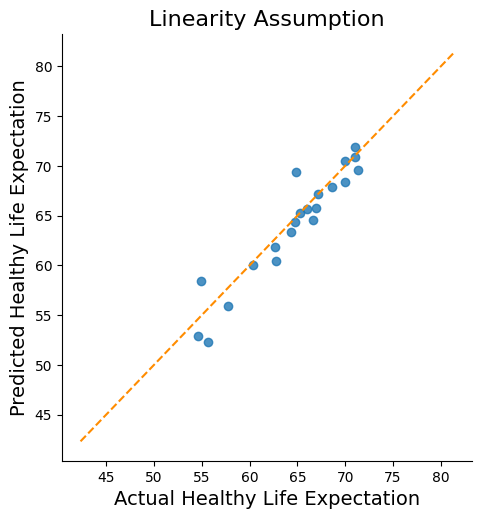

In [ ]:
# Plotting the observed vs predicted values
sns.lmplot(x='Y Test', y='Y Prediction', data=y_data, fit_reg=False)
    
# Plotting the diagonal line
line_coords = np.arange(y_data[['Y Test', 'Y Prediction']].min().min()-10, 
                        y_data[['Y Test', 'Y Prediction']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Healthy Life Expectation', fontsize=14)
plt.xlabel('Actual Healthy Life Expectation', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

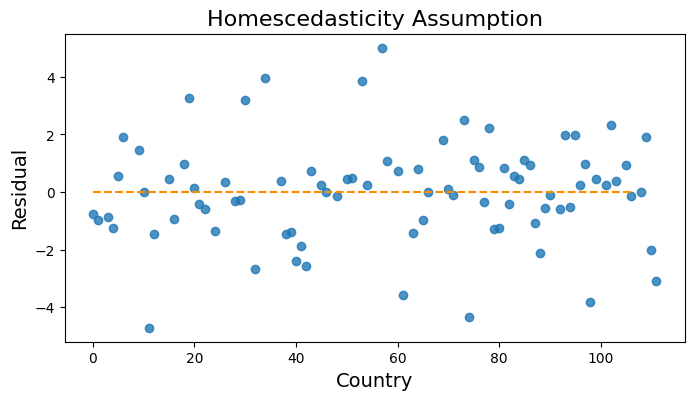

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=x_train.index, y=residuals, alpha=0.8)
plt.plot(np.repeat(0, len(dfreg.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show() 

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.3205783398494706


In [ ]:
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape, '%')


MAPE: 2.2173294237605288 %
